In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
tods = [1,2,3,4,5]

In [6]:
years = [2018,2019,2020]

In [ ]:
df_all = pd.DataFrame()


for year in years:
    print('Working on year ' + str(year))
    if year == 2018:
        months = [11,12]
    elif year == 2020:
        months = [1,2]
    else:
        months = [1,2,3,4,5,6,7,8,9,10,11,12]
        
    for month in months:
        print('Working on month ' + str(month))
        
        for tod in tods:
            print('Working on tod ' + str(tod))

            store = pd.HDFStore('C:/Workspace/TNC-Demand-Model/Outputs/Chicago_TNC_Trips_20.H5')
            df = store.select(where = ['YEAR == ' + str(year), 'MONTH == ' + str(month)], key = 'Weekday_' + str(tod))
            store.close()

            df['TOD'] = tod

            df = df[df['TRIP_LENGTH_MILES'] <= 50]
            df = df[df['TRAVEL_TIME_MINUTES'] <= 120]

            #drop the trips that have a trip length of 0 or travel time of 0 because they do not make sense
            df = df[df['TRIP_LENGTH_MILES'] > 0]
            df = df[df['TRAVEL_TIME_MINUTES'] > 0]

            #filter out the trips that have an unreasonable speed
            df = df[df['SPEED']<120]

            print('Maximum Travel Time')
            print(df['TRAVEL_TIME_MINUTES'].max())

            print('Maximum Trip Length')
            print(df['TRIP_LENGTH_MILES'].max())

            print('Maximum Speed')
            print(df['SPEED'].max())


            #census tract 17031980000 replaces the trips assigned to census tract 17031770700 because they are likely misasigned.
            #Census tract 17031980000 contains contains O'Hare airport and census tract is adjacent. The trips assigned to census tract 17031770700 are likely trips from the airport.
            df.loc[df['ORIGIN'] == 17031770700, 'ORIGIN'] = 17031980000
            df.loc[df['DESTINATION'] == 17031770700, 'DESTINATION'] = 17031980000


            df = df[df['EXTERNAL_FLAGGER'] == 0]
            df = df[df['INTERNAL_EXTERNAL_FLAGGER'] == 0]



            df['PRIVATE_PICKUPS'] = np.where(df['SHARED_FLAGGER'] == 0, 1,0)
            df['SHARED_PICKUPS'] = np.where(df['SHARED_FLAGGER'] == 1, 1,0)
            df['PICKUPS'] = 1

            df = df.groupby(by= ['ORIGIN','YEAR', 'MONTH','TOD'], as_index =False).sum()

            df_all = df_all.append(df)

df_all = df_all.groupby(by= ['ORIGIN','YEAR', 'MONTH','TOD'], as_index =False).sum()


Working on year 2018
Working on month 11
Working on tod 1
Maximum Travel Time
118.61666666666666
Maximum Trip Length
50.0
Maximum Speed
118.58823529411762
Working on tod 2
Maximum Travel Time
119.9
Maximum Trip Length
50.0
Maximum Speed
113.87755102040818
Working on tod 3
Maximum Travel Time
119.91666666666667
Maximum Trip Length
50.0
Maximum Speed
113.89090909090909
Working on tod 4
Maximum Travel Time
119.86666666666666
Maximum Trip Length
50.0
Maximum Speed
111.06382978723404
Working on tod 5
Maximum Travel Time
119.71666666666667
Maximum Trip Length
50.0
Maximum Speed
110.76923076923076
Working on month 12
Working on tod 1
Maximum Travel Time
117.8
Maximum Trip Length
50.0
Maximum Speed
111.23595505617978
Working on tod 2
Maximum Travel Time
119.56666666666666
Maximum Trip Length
50.0
Maximum Speed
117.62376237623762
Working on tod 3
Maximum Travel Time
120.0
Maximum Trip Length
50.0
Maximum Speed
116.07476635514018
Working on tod 4
Maximum Travel Time
119.91666666666667
Maximum Tr

In [ ]:
df_all.head()

In [ ]:
weekday.WEEKDAYS.sum()

In [ ]:

weekday = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Number of Weekdays.csv')

df2 = df_all.merge(weekday, on = ['YEAR','MONTH'])


df2['AVG_WD_PICKUPS'] = df2['PICKUPS']/df2['WEEKDAYS']
df2['AVG_WD_PRIVATE_PICKUPS'] = df2['PRIVATE_PICKUPS']/df2['WEEKDAYS']
df2['AVG_WD_SHARED_PICKUPS'] = df2['SHARED_PICKUPS']/df2['WEEKDAYS']


In [ ]:
empty = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Empty_Chicago_Matrix.csv')

In [ ]:
len(empty)

In [ ]:
empty = empty.groupby(by =['YEAR','MONTH','TOD','ORIGIN'], as_index = False).first()

In [ ]:
empty = empty.drop('DESTINATION', axis = 1)

In [ ]:
empty['AIR_F'] = np.where((empty['ORIGIN'].isin([17031980000,17031980100])),1,0)

In [ ]:
df2['AVG_WD_PICKUPS'].min()

In [ ]:
df2['AVG_WD_PICKUPS'].mean()

In [ ]:
df2['AVG_WD_PICKUPS'].max()

In [ ]:
df2[(df2['MONTH'] == 11)&(df2['YEAR'] == 2018)]['AVG_WD_PICKUPS'].sum()

In [ ]:
df2.TOD.unique()

In [ ]:
df2[['TOD','PICKUPS']].groupby(by = 'TOD').sum()/weekday.WEEKDAYS.sum()

In [ ]:
df_final[['MONTH','YEAR','PICKUPS']].groupby(by = ['MONTH','YEAR']).sum()/weekday.WEEKDAYS.sum()

In [ ]:
df2[['MONTH','YEAR','PICKUPS']].groupby(by = ['MONTH','YEAR']).sum()

In [ ]:
len(df2)

In [ ]:
len(df_final)

In [ ]:
df2['PICKUPS'].mean()

In [ ]:
df2['PICKUPS'].max()

In [ ]:
df2['PICKUPS'].min()

In [ ]:
df2['PICKUPS'].sum()

In [ ]:
len(empty)

In [ ]:
df_final = empty.merge(df2, how ='left',on = ['ORIGIN','MONTH','YEAR','TOD'])

In [ ]:
len(df_final)

In [ ]:
df_final['PICKUPS'] = df_final['PICKUPS'].fillna(0)
df_final['PRIVATE_PICKUPS'] = df_final['PRIVATE_PICKUPS'].fillna(0)
df_final['SHARED_PICKUPS'] = df_final['SHARED_PICKUPS'].fillna(0)


df_final['AVG_WD_PICKUPS'] = df_final['AVG_WD_PICKUPS'].fillna(0)
df_final['AVG_WD_PRIVATE_PICKUPS'] = df_final['AVG_WD_PRIVATE_PICKUPS'].fillna(0)
df_final['AVG_WD_SHARED_PICKUPS'] = df_final['AVG_WD_SHARED_PICKUPS'].fillna(0)

In [ ]:
df_final.head()

In [ ]:
acs = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Chicago_ACS_Data.csv')

In [ ]:
acs['HHLDS_LESS_35K'] = acs['TOTAL_HHLDS_LESS_10K'] + acs['TOTAL_HHLDS_10K_15K'] + acs['TOTAL_HHLDS_15K_25K'] + acs['TOTAL_HHLDS_25K_35K']
acs['HHLDS_35K_150K'] = acs['TOTAL_HHLDS_35K_50K'] + acs['TOTAL_HHLDS_50K_75K'] + acs['TOTAL_HHLDS_75K_100K'] + acs['TOTAL_HHLDS_100K_150K']
acs['HHLDS_MORE_150K'] =  acs['TOTAL_HHLDS_150K_200K'] + acs['TOTAL_HHLDS_200KP']

In [ ]:
acs['T20_35'] = acs['AGE_20_24'] + acs['AGE_25_34']
acs['T35_65'] = acs['AGE_35_44'] + acs['AGE_45_54'] + acs['AGE_55_59'] + acs['AGE_60_64']
acs['T65P'] = acs['AGE_65_74'] + acs['AGE_75_84'] + acs['AGE_85P']


acs['PER_20_35'] = (acs['T20_35']/acs['TOTAL_POP'])*100
acs['PER_35_65'] = (acs['T35_65']/acs['TOTAL_POP'])*100
acs['PER_65P'] = (acs['T65P']/acs['TOTAL_POP'])*100

In [ ]:
acs['P_BACH_25P'] = (acs['TOTAL_POP_25P_BACHELORS_HIGHER']/acs['TOTAL_POP'])*100

In [ ]:
acs2 = acs[['PER_20_35','P_BACH_25P','PER_35_65','PER_65P','YEAR','MONTH','TOD','CENSUS_TRACT','TOTAL_POP','TOTAL_HHLDS','AVG_HHLD_SIZE','HHLDS_MEAN_INCOME','HHLDS_LESS_35K','HHLDS_35K_150K','HHLDS_MORE_150K','HHLDS_0_VEH','AVG_VEH_PER_HHLD','HHLDS_MEDIAN_INCOME','TOTAL_POP_25P_BACHELORS_HIGHER','TOTAL_MALE', 'TOTAL_FEMALE','MEDIAN_AGE']]

In [ ]:
acs2.head()

In [ ]:
lehd = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/CHI_WAC.csv',index_col = 0)

In [ ]:
lehd['TOTAL_EMP'] = lehd['CNS01'] + lehd['CNS02'] + lehd['CNS03'] + lehd['CNS04'] + lehd['CNS05'] + lehd['CNS06'] + lehd['CNS07'] + lehd['CNS08'] + lehd['CNS09'] + lehd['CNS10'] + lehd['CNS11'] + lehd['CNS12'] + lehd['CNS13'] + lehd['CNS14'] + lehd['CNS15'] + lehd['CNS16'] + lehd['CNS17'] + lehd['CNS18'] + lehd['CNS19'] + lehd['CNS20']

In [ ]:
lehd['OTHER_EMP'] = lehd['CNS01'] + lehd['CNS02'] + lehd['CNS03'] + lehd['CNS04'] + lehd['CNS05'] + lehd['CNS06'] + lehd['CNS08'] + lehd['CNS09'] + lehd['CNS10'] + lehd['CNS11'] + lehd['CNS12'] + lehd['CNS13'] + lehd['CNS14'] + lehd['CNS15'] + lehd['CNS16'] + lehd['CNS17'] + lehd['CNS19'] + lehd['CNS20']

In [ ]:
lehd['RETAIL_EMP'] = lehd['CNS07']

In [ ]:
lehd['FOOD_EMP'] = lehd['CNS18']

In [ ]:
lehd['PER_RETAIL'] = lehd['RETAIL_EMP']/lehd['TOTAL_EMP']
lehd['PER_FOOD'] = lehd['FOOD_EMP']/lehd['TOTAL_EMP']
lehd['PER_OTHER'] = lehd['OTHER_EMP']/lehd['TOTAL_EMP']

In [ ]:
access = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Accessibility_Variables.csv',index_col = 0)

In [ ]:
df_final = df_final.merge(access, on = ['ORIGIN','MONTH','YEAR','TOD'], how = 'left')

In [ ]:
df_final['TRACTCE10'] = df_final.ORIGIN.astype(str)
df_final['TRACTCE10'] = df_final['TRACTCE10'].apply(lambda x : x[5:11])
df_final['TRACTCE10'] = df_final['TRACTCE10'].astype(int)

In [ ]:
df_final = df_final.merge(lehd[['PER_OTHER','PER_FOOD','PER_RETAIL','TOTAL_EMP','RETAIL_EMP','OTHER_EMP','FOOD_EMP','TRACTCE10','MONTH','YEAR']], how = 'left', on = ['TRACTCE10','MONTH','YEAR'])

In [ ]:
df_final = df_final.merge(acs2, how = 'left', left_on = ['ORIGIN','MONTH','YEAR','TOD'], right_on = ['CENSUS_TRACT','MONTH','YEAR','TOD'])

In [ ]:
transit_access = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Transit_Accessibility_Variables.csv', index_col = 0)

In [ ]:
all_access = access.merge(transit_access, on = ['ORIGIN','MONTH','YEAR','TOD'], how = 'right', suffixes = ('_AUTO','_TRANSIT'))

In [ ]:
log_sum = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_LOGSUM.csv', index_col = 0)

In [ ]:
log_sum.head()

In [ ]:
df_final = df_final.merge(log_sum, on = ['ORIGIN','MONTH','YEAR','TOD'], how = 'left')

In [ ]:
df_final.head()

In [ ]:
vars = ['TOTAL_EMP','RETAIL_EMP','OTHER_EMP','FOOD_SERVICES_EMP','TOTAL_POP','TOTAL_HHLDS','TOTAL_HHLDS_MORE_150K']

In [ ]:
#for var in vars:
 #   print('Working on variable ' + var)
  #  all_access[var + '_WITHIN_5_TRANSIT_AUTO_DIFF'] = all_access[var + '_WITHIN_5_TRANSIT'] - all_access[var + '_WITHIN_5_AUTO']
   # all_access[var + '_WITHIN_15_TRANSIT_AUTO_DIFF'] = all_access[var + '_WITHIN_15_TRANSIT'] - all_access[var + '_WITHIN_15_AUTO']
    #all_access[var + '_WITHIN_30_TRANSIT_AUTO_DIFF'] = all_access[var + '_WITHIN_30_TRANSIT'] - all_access[var + '_WITHIN_30_AUTO']
    #all_access[var + '_WITHIN_45_TRANSIT_AUTO_DIFF'] = all_access[var + '_WITHIN_45_TRANSIT'] - all_access[var + '_WITHIN_45_AUTO']
    #all_access[var + '_WITHIN_60_TRANSIT_AUTO_DIFF'] = all_access[var + '_WITHIN_60_TRANSIT'] - all_access[var + '_WITHIN_60_AUTO']

In [ ]:
drop = [ 'TOTAL_POP_WITHIN_5_AUTO',
       'TOTAL_POP_WITHIN_15_AUTO', 'TOTAL_POP_WITHIN_30_AUTO',
       'TOTAL_POP_WITHIN_45_AUTO', 'TOTAL_POP_WITHIN_60_AUTO',
       'TOTAL_HHLDS_MORE_150K_WITHIN_60_AUTO',
       'TOTAL_HHLDS_MORE_150K_WITHIN_45_AUTO',
       'TOTAL_HHLDS_MORE_150K_WITHIN_30_AUTO',
       'TOTAL_HHLDS_MORE_150K_WITHIN_15_AUTO',
       'TOTAL_HHLDS_MORE_150K_WITHIN_5_AUTO', 'TOTAL_HHLDS_WITHIN_60_AUTO',
       'TOTAL_HHLDS_WITHIN_45_AUTO', 'TOTAL_HHLDS_WITHIN_30_AUTO',
       'TOTAL_HHLDS_WITHIN_15_AUTO', 'TOTAL_HHLDS_WITHIN_5_AUTO',
       'FOOD_SERVICES_EMP_WITHIN_60_AUTO', 'FOOD_SERVICES_EMP_WITHIN_45_AUTO',
       'FOOD_SERVICES_EMP_WITHIN_30_AUTO', 'FOOD_SERVICES_EMP_WITHIN_15_AUTO',
       'FOOD_SERVICES_EMP_WITHIN_5_AUTO', 'OTHER_EMP_WITHIN_60_AUTO',
       'OTHER_EMP_WITHIN_45_AUTO', 'OTHER_EMP_WITHIN_30_AUTO',
       'OTHER_EMP_WITHIN_15_AUTO', 'OTHER_EMP_WITHIN_5_AUTO',
       'RETAIL_EMP_WITHIN_60_AUTO', 'RETAIL_EMP_WITHIN_45_AUTO',
       'RETAIL_EMP_WITHIN_30_AUTO', 'RETAIL_EMP_WITHIN_15_AUTO',
       'RETAIL_EMP_WITHIN_5_AUTO', 'TOTAL_EMP_WITHIN_60_AUTO',
       'TOTAL_EMP_WITHIN_45_AUTO', 'TOTAL_EMP_WITHIN_30_AUTO',
       'TOTAL_EMP_WITHIN_15_AUTO', 'TOTAL_EMP_WITHIN_5_AUTO',
        'TOTAL_POP_WITHIN_5_TRANSIT',
       'TOTAL_POP_WITHIN_15_TRANSIT', 'TOTAL_POP_WITHIN_30_TRANSIT',
       'TOTAL_POP_WITHIN_45_TRANSIT', 'TOTAL_POP_WITHIN_60_TRANSIT',
       'TOTAL_HHLDS_MORE_150K_WITHIN_60_TRANSIT',
       'TOTAL_HHLDS_MORE_150K_WITHIN_45_TRANSIT',
       'TOTAL_HHLDS_MORE_150K_WITHIN_30_TRANSIT',
       'TOTAL_HHLDS_MORE_150K_WITHIN_15_TRANSIT',
       'TOTAL_HHLDS_MORE_150K_WITHIN_5_TRANSIT',
       'TOTAL_HHLDS_WITHIN_60_TRANSIT', 'TOTAL_HHLDS_WITHIN_45_TRANSIT',
       'TOTAL_HHLDS_WITHIN_30_TRANSIT', 'TOTAL_HHLDS_WITHIN_15_TRANSIT',
       'TOTAL_HHLDS_WITHIN_5_TRANSIT', 'FOOD_SERVICES_EMP_WITHIN_60_TRANSIT',
       'FOOD_SERVICES_EMP_WITHIN_45_TRANSIT',
       'FOOD_SERVICES_EMP_WITHIN_30_TRANSIT',
       'FOOD_SERVICES_EMP_WITHIN_15_TRANSIT',
       'FOOD_SERVICES_EMP_WITHIN_5_TRANSIT', 'OTHER_EMP_WITHIN_60_TRANSIT',
       'OTHER_EMP_WITHIN_45_TRANSIT', 'OTHER_EMP_WITHIN_30_TRANSIT',
       'OTHER_EMP_WITHIN_15_TRANSIT', 'OTHER_EMP_WITHIN_5_TRANSIT',
       'RETAIL_EMP_WITHIN_60_TRANSIT', 'RETAIL_EMP_WITHIN_45_TRANSIT',
       'RETAIL_EMP_WITHIN_30_TRANSIT', 'RETAIL_EMP_WITHIN_15_TRANSIT',
       'RETAIL_EMP_WITHIN_5_TRANSIT', 'TOTAL_EMP_WITHIN_60_TRANSIT',
       'TOTAL_EMP_WITHIN_45_TRANSIT', 'TOTAL_EMP_WITHIN_30_TRANSIT',
       'TOTAL_EMP_WITHIN_15_TRANSIT', 'TOTAL_EMP_WITHIN_5_TRANSIT']

In [ ]:
#all_access = all_access.drop(drop, axis = 1)

In [ ]:
all_access.head()

In [ ]:
df_final.TOD

In [ ]:
df_final = df_final.merge(all_access, on = ['ORIGIN','MONTH','YEAR','TOD'])

In [ ]:
df_final.head()

In [ ]:
for col in df_final.columns:
    print(col)

In [ ]:
drop = ['SPEED','TRIP_LENGTH_MILES','TRAVEL_TIME_MINUTES']

In [ ]:
df_final = df_final.drop(drop, axis = 1)

In [ ]:
area = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Census_Tracts_Area.csv')

In [ ]:
df_final = df_final.merge(area[['CENSUS_TRACT','AREA_SQ_MI']], how = 'left', on = 'CENSUS_TRACT')

In [ ]:
df_final['E_P'] = df_final['TOTAL_EMP'] + df_final['TOTAL_POP']

In [ ]:
df_final['POP'] = df_final['TOTAL_POP']
density_vars = ['TOTAL_EMP',
'RETAIL_EMP',
'OTHER_EMP',
'FOOD_EMP',
'POP',
'TOTAL_HHLDS','E_P']

for var in density_vars:
    df_final[var + '_DEN'] = df_final[var]/df_final['AREA_SQ_MI']

In [ ]:
df_final['TOD_1'] = np.where(df_final['TOD'] == 1, 1,0)
df_final['TOD_2'] = np.where(df_final['TOD'] == 2, 1,0)
df_final['TOD_3'] = np.where(df_final['TOD'] == 3, 1,0)
df_final['TOD_4'] = np.where(df_final['TOD'] == 4, 1,0)
df_final['TOD_5'] = np.where(df_final['TOD'] == 5, 1,0)

In [ ]:
df_final['TOR_F'] = np.where((df_final['ORIGIN'].isin([17031081402,17031330100,17031841000])),1,0)

In [ ]:
veh_inc = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Formatted_Vehicle_Ownership_Income.csv', index_col = 0)

In [ ]:
df_final.head()

In [ ]:
veh_inc.columns

In [ ]:
veh_inc.columns = ['NAMELSAD10', 'GEOID10', 'Census Tract', 'LOW_INC_0', 'LOW_INC_1', 'LOW_INC_2',
       'LOW_3P', 'HI_INC_0', 
 'HI_INC_1', 'HI_INC_2','HI_INC_3P', 'HI_INC_1P', 'LOW_INC_1P']

In [ ]:
veh_inc.head()

In [ ]:
df_final = df_final.merge(veh_inc, how = 'left', left_on = 'ORIGIN', right_on = 'GEOID10')

In [ ]:
variables = ['AIR_F','TOTAL_EMP',
'RETAIL_EMP',
'OTHER_EMP',
'FOOD_EMP','TOTAL_POP','PER_RETAIL','PER_OTHER','PER_FOOD',
'TOTAL_HHLDS',
'AVG_HHLD_SIZE',
'HHLDS_MEAN_INCOME',
'HHLDS_LESS_35K',
'HHLDS_35K_150K',
'HHLDS_MORE_150K',
'HHLDS_0_VEH',
'AVG_VEH_PER_HHLD',
'HHLDS_MEDIAN_INCOME',
'TOTAL_POP_25P_BACHELORS_HIGHER',
'TOTAL_MALE','TOR_F','PER_20_35','P_BACH_25P','PER_35_65','PER_65P',
'TOTAL_FEMALE','LOGSUM','HI_INC_0','LOW_INC_0','HI_INC_1P','POP_DEN',
'LOW_INC_1P','MEDIAN_AGE','E_P','E_P_DEN']

#for var in variables:
 #   df2[var + '_1'] = df2[var]*df2['TOD_1']
  #  df2[var + '_2'] = df2[var]*df2['TOD_2']
   # df2[var + '_3'] = df2[var]*df2['TOD_3']
    #df2[var + '_4'] = df2[var]*df2['TOD_4']
    #df2[var + '_5'] = df2[var]*df2['TOD_5']

In [ ]:
df_final = df_final.fillna(0)

In [ ]:
df_final['ENTITY'] = df_final['CENSUS_TRACT']
df_final['TIME'] = df_final['YEAR']*1000 + df_final['MONTH']*10 + df_final['TOD']

In [ ]:
len(df_final[df_final['PICKUPS'] == 0])

In [ ]:
len(df_final)

In [ ]:
len(tod1)

In [ ]:
len(tod2)

In [ ]:
len(tod3)

In [ ]:
df_final['JAN'] = np.where(df_final['MONTH'] == 1,1,0)
df_final['FEB'] = np.where(df_final['MONTH'] == 2,1,0)
df_final['MAR'] = np.where(df_final['MONTH'] == 3,1,0)
df_final['APR'] = np.where(df_final['MONTH'] == 4,1,0)
df_final['MAY'] = np.where(df_final['MONTH'] == 5,1,0)
df_final['JUN'] = np.where(df_final['MONTH'] == 6,1,0)
df_final['JUL'] = np.where(df_final['MONTH'] == 7,1,0)
df_final['AUG'] = np.where(df_final['MONTH'] == 8,1,0)
df_final['SEP'] = np.where(df_final['MONTH'] == 9,1,0)
df_final['OCT'] = np.where(df_final['MONTH'] == 10,1,0)
df_final['NOV'] = np.where(df_final['MONTH'] == 11,1,0)
df_final['DEC'] = np.where(df_final['MONTH'] == 12,1,0)

In [ ]:
tod1 = df_final[df_final['TOD'] == 1]
tod2 = df_final[df_final['TOD'] == 2]
tod3 = df_final[df_final['TOD'] == 3]
tod4 = df_final[df_final['TOD'] == 4]
tod5 = df_final[df_final['TOD'] == 5]


In [ ]:
tod1.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Origin_Estimation_File_TOD_1.csv')
tod2.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Origin_Estimation_File_TOD_2.csv')
tod3.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Origin_Estimation_File_TOD_3.csv')
tod4.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Origin_Estimation_File_TOD_4.csv')
tod5.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Origin_Estimation_File_TOD_5.csv')

In [ ]:
#tod1[['MONTH','YEAR','AVG_WD_PICKUPS']].groupby(by = ['MONTH','YEAR']).sum()

In [91]:
tod2.PICKUPS.sum()

12367166.0

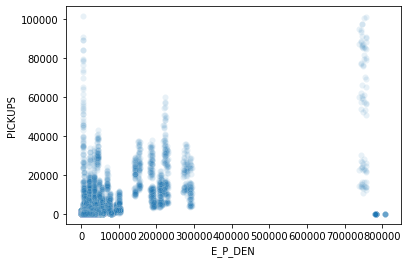

In [93]:
sns.scatterplot(y = df_final['PICKUPS'], x = df_final['E_P_DEN'], alpha = 0.1)

In [323]:
#df2 = df2[df2['ORIGIN'] != 17031030702]

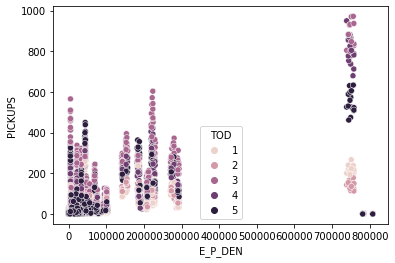

In [324]:
sns.scatterplot(y = df2['PICKUPS'], x = df2['E_P_DEN'], hue = df2['TOD'])

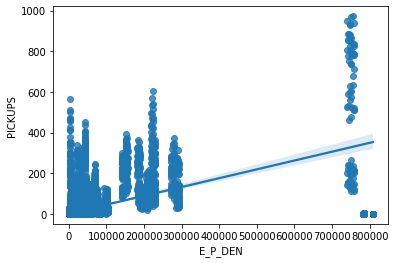

In [325]:
sns.regplot(y = df2['PICKUPS'], x = df2['E_P_DEN'])